# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

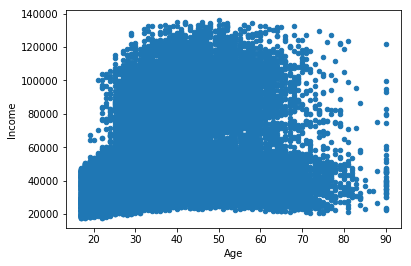

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

In [1]:
#En cuanto a la correlación, es notable que en el rango de 40 - 60 años el ingreso es mayor que en el rango de 20 - 40 o 60 - 90

In [4]:
#import
from sklearn.linear_model import LinearRegression

In [5]:
linreg = LinearRegression(fit_intercept=False)

In [8]:
linreg.fit(income[["Age"]], income["Income"])
linreg

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [9]:
linreg.coef_

array([1291.82348999])

In [11]:
dat = [[30],[40]]

In [12]:
Y_est = linreg.predict(dat)
Y_est

array([38754.70469957, 51672.93959943])

# Exercise 4.2
Evaluate the model using the MSE

In [14]:
from sklearn import metrics
import numpy as np

In [16]:
y_est = linreg.predict(income[["Age"]])

In [17]:
print('MSE:', metrics.mean_squared_error(income['Income'],y_est))
print('RMSE',np.sqrt(metrics.mean_squared_error(income['Income'], y_est)))

MSE: 711412514.3590876
RMSE 26672.317378868443


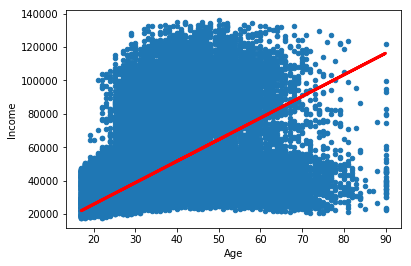

In [19]:
income.plot(x='Age', y='Income', kind='scatter')
plt.plot((income[["Age"]]), y_est, color='red', linewidth=3)
plt.show()


# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [107]:
X = income['Age'].values
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples),X]
Y=income['Income']

In [108]:
income['Age2'] = income['Age']**2
X2 = income[['Age','Age2']].values
n_samples = X.shape[0]
X2 = np.c_[np.ones(n_samples),X2]

In [110]:
linearRegr = LinearRegression()
linearRegr1 = SGDRegressor(max_iter=30000,tol = None)

linearRegr.fit(X2, Y)
print('OLS COEF: %s' % linearRegr.coef_)
linearRegr1.fit(X2, Y)
print('OLS COEF: %s' % linearRegr1.coef_)

OLS COEF: [   0.         3131.77014151  -30.54341041]


C:\Users\co.nmartinezc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


OLS COEF: [-4.79152311e+10  8.86897296e+10  1.91973358e+11]


In [112]:
print ('\nOLS 30 YEARS: %.1f)' % linearRegr.predict(np.array([[1,30,900]])))
print ('OLS 40 YEARS: %.1f) \n' % linearRegr.predict(np.array([[1,40,1600]])))
print ('SGD 30 YEARS: %.1f)' % linearRegr1.predict(np.array([[1,30,900]])) )
print ('SGD 40 YEARS: %.1f)' % linearRegr1.predict(np.array([[1,40,1600]])))


OLS 30 YEARS: 50239.0)
OLS 40 YEARS: 60176.3) 

SGD 30 YEARS: 175322304917489.9)
SGD 40 YEARS: 310590552559343.8)


In [115]:
y_pred = linearRegr.predict(X2)
print('RMSE_OLS:', np.sqrt(metrics.mean_squared_error(income['Income'], y_pred)))
y_pred = linearRegr1.predict(X2)
print('RMSE_SGD:', np.sqrt(metrics.mean_squared_error(income['Income'], y_pred)))

RMSE_OLS: 23337.65756844112
RMSE_SGD: 396554222996953.3


# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [30]:
from sklearn.linear_model import SGDRegressor
lreg = SGDRegressor(fit_intercept=False, max_iter=5000,tol = 0.0000001)

In [31]:
LX = income[['Age', 'Education-Num', 'Hours per week', 'Capital Gain', 'Capital Loss']]
LY = income["Income"]

In [32]:
lreg.fit(LX, LY)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=False, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=5000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=1e-07, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [33]:
Est = lreg.predict(LX)

In [34]:
print('MSE:',metrics.mean_squared_error(income['Income'],Est))
print('RMSE:', np.sqrt(metrics.mean_squared_error(income['Income'],Est)))

MSE: 5.962682561932569e+34
RMSE: 2.4418604714300467e+17


In [116]:
lreg.coef_

array([-1.64769355e+10,  8.85808996e+08, -2.73162753e+10, -3.27178061e+13,
        1.22088586e+11])

In [ ]:
# Teniendo en cuenta un MSE inferior que el de la anterior regresión, es posible concluir que la inclusión de más variables, nos ayudan a explicar de mejor manera el comportamiento de los datos

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [85]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [86]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [88]:
data["ChurnNew"] = data["Churn?"] == "True." 
X =data[['Day Mins', 'VMail Message', 'Day Calls','Night Calls', 'Intl Calls', 'Night Charge']]
Y =data['ChurnNew']

In [89]:
from sklearn.model_selection import train_test_split
validation_size = 0.30
seed = 1
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [91]:
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression(solver='liblinear',C=1e9)
reglog.fit(X_train, Y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [93]:
Est= reglog.predict(X_validation)

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_validation, Est)

array([[854,   1],
       [142,   3]], dtype=int64)

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_validation, Est)

0.857